In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('slr12.csv')
x = df['AnnualFranchiseFee'].values
y = df['StartUpCost'].values

def get_mean(arr):
    return np.sum(arr)/len(arr)

def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x) * (arr_y - mean_y)
    return np.sum(final_arr)

In [4]:
def get_coefficients(x,y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    c = y_mean - x_mean * m
    return m, c

def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, c = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m*x + c
        prediction.append(y)

    mse = mean_squared_error(prediction, y_test)
    print("The MSE score of the model is: ", mse)
    return prediction

linear_regression(x[:30], y[:30], x[30:], y[30:])

The MSE score of the model is:  97482.15509744169


[863.2891581051077,
 1237.6414070056592,
 813.3755249183675,
 1013.0300576653283,
 1013.0300576653283,
 963.1164244785881]

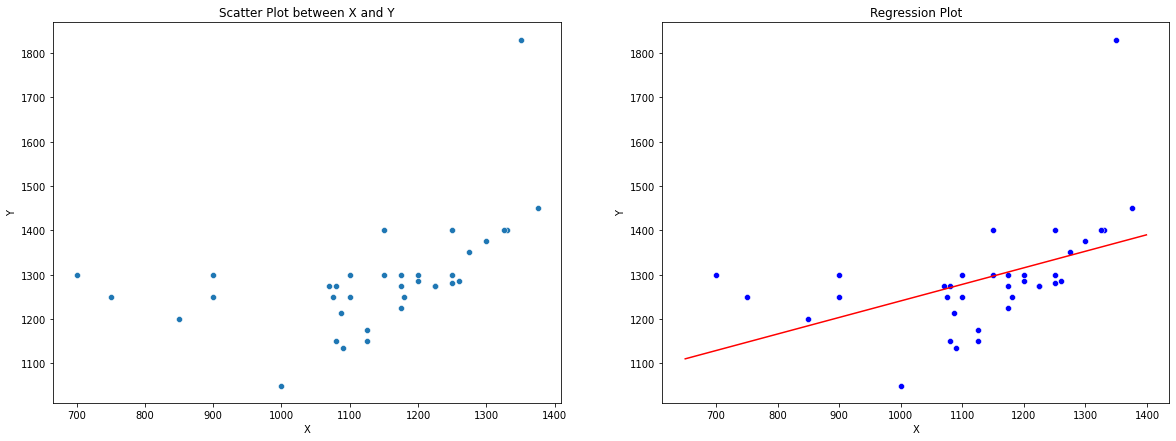

In [6]:
def plot_reg_line(x, y):
    prediction = []
    m, c = get_coefficients(x, y)
    for x0 in range(650, 1400):
        yhat = m*x0 + c
        prediction.append(yhat)

    fig = plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot between X and Y')

    plt.subplot(1,2,2)
    sns.scatterplot(x=x, y=y, color='blue')
    sns.lineplot(x=[i for i in range(650, 1400)], y = prediction, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Plot')
    plt.show()

plot_reg_line(x,y)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv('slr12.csv')
x = df['AnnualFranchiseFee'].values
y = df['StartUpCost'].values

reg = LinearRegression()
reg.fit(x[:30].reshape(-1, 1), y[:30])
prediction = reg.predict(x[30:].reshape(-1, 1))
mse = mean_squared_error(prediction, y[30:])

print("the MSE score of the model is: ", mse)

the MSE score of the model is:  97482.15509744169


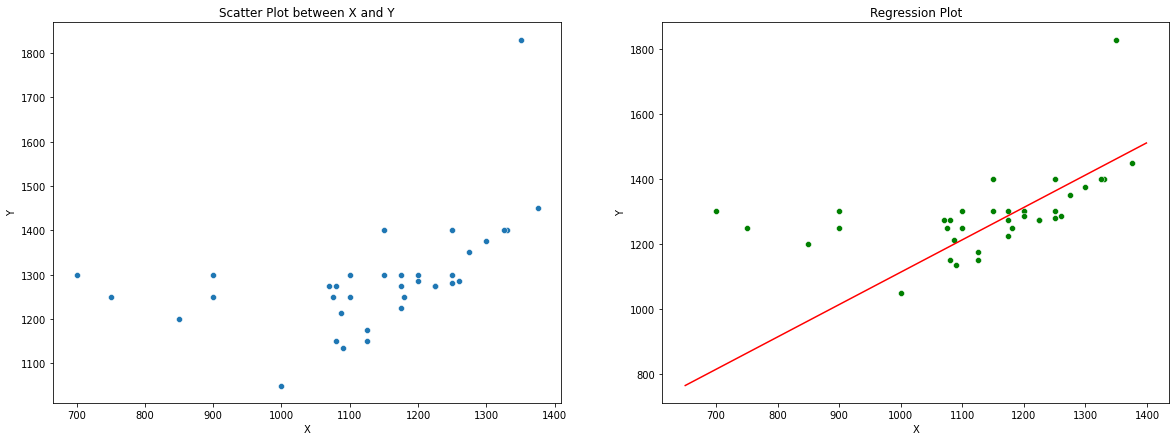

In [8]:
prediction = reg.predict(np.array([i for i in range(650, 1400)]).reshape(-1, 1))

fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot between X and Y')

plt.subplot(1,2,2)
sns.scatterplot(x=x, y=y, color = 'green')
sns.lineplot(x = [i for i in range(650, 1400)], y = prediction, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot')
plt.show()